# <p align="center"><ins>Student Depression - EDA Project</ins></p>
<hr style="border:2px solid skyblue">

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
# now we going to avoid warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = df = pd.read_csv('Student Depression Dataset.csv').copy()
df

id  Gender   Age           City Profession  Academic Pressure  \
0           2    Male  33.0  Visakhapatnam    Student                5.0   
1           8  Female  24.0      Bangalore    Student                2.0   
2          26    Male  31.0       Srinagar    Student                3.0   
3          30  Female  28.0       Varanasi    Student                3.0   
4          32  Female  25.0         Jaipur    Student                4.0   
...       ...     ...   ...            ...        ...                ...   
27896  140685  Female  27.0          Surat    Student                5.0   
27897  140686    Male  27.0       Ludhiana    Student                2.0   
27898  140689    Male  31.0      Faridabad    Student                3.0   
27899  140690  Female  18.0       Ludhiana    Student                5.0   
27900  140699    Male  27.0          Patna    Student                4.0   

       Work Pressure  CGPA  Study Satisfaction  Job Satisfaction  \
0                0.0  8.97                 2.0               0.0   
1                0.0  5.90                 5.0               0.0   
2                0.0  7.03                 5.0               0.0   
3                0.0  5.59                 2.0               0.0   
4                0.0  8.13                 3.0               0.0   
...              ...   ...                 ...               ...   
27896            0.0  5.75                 5.0               0.0   
27897            0.0  9.40                 3.0               0.0   
27898            0.0  6.61                 4.0               0.0   
27899            0.0  6.88                 2.0               0.0   
27900            0.0  9.24                 1.0               0.0   

          Sleep Duration Dietary Habits    Degree  \
0              5-6 hours        Healthy   B.Pharm   
1              5-6 hours       Moderate       BSc   
2      Less than 5 hours        Healthy        BA   
3              7-8 hours       Moderate       BCA   
4              5-6 hours       Moderate    M.Tech   
...                  ...            ...       ...   
27896          5-6 hours      Unhealthy  Class 12   
27897  Less than 5 hours        Healthy       MSc   
27898          5-6 hours      Unhealthy        MD   
27899  Less than 5 hours        Healthy  Class 12   
27900  Less than 5 hours        Healthy       BCA   

      Have you ever had suicidal thoughts ?  Work/Study Hours  \
0                                       Yes               3.0   
1                                        No               3.0   
2                                        No               9.0   
3                                       Yes               4.0   
4                                       Yes               1.0   
...                                     ...               ...   
27896                                   Yes               7.0   
27897                                    No               0.0   
27898                                    No              12.0   
27899                                   Yes              10.0   
27900                                   Yes               2.0   

       Financial Stress Family History of Mental Illness  Depression  
0                   1.0                               No           1  
1                   2.0                              Yes           0  
2                   1.0                              Yes           0  
3                   5.0                              Yes           1  
4                   1.0                               No           0  
...                 ...                              ...         ...  
27896               1.0                              Yes           0  
27897               3.0                              Yes           0  
27898               2.0                               No           0  
27899               5.0                               No           1  
27900               3.0                              Yes           1  

[27901 row

In [4]:
print(f'shape : {df.shape} \n columns : {df.columns}') 

shape : (27901, 18) 
 columns : Index(['id', 'Gender', 'Age', 'City', 'Profession', 'Academic Pressure',
       'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction',
       'Sleep Duration', 'Dietary Habits', 'Degree',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness', 'Depression'],
      dtype='object')


In [5]:
for col in df.columns :
    print(f'{col} : {df[col].dtypes}')

id : int64
Gender : object
Age : float64
City : object
Profession : object
Academic Pressure : float64
Work Pressure : float64
CGPA : float64
Study Satisfaction : float64
Job Satisfaction : float64
Sleep Duration : object
Dietary Habits : object
Degree : object
Have you ever had suicidal thoughts ? : object
Work/Study Hours : float64
Financial Stress : float64
Family History of Mental Illness : object
Depression : int64


In [6]:
# Change Column 'Age' to Integer
df['Age'] = df['Age'].astype(int)
print(f'Age : {df["Age"].dtypes}')

Age : int64


In [7]:
df.isnull().sum()

id                                       0
Gender                                   0
Age                                      0
City                                     0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         3
Family History of Mental Illness         0
Depression                               0
dtype: int64

In [8]:
df['Financial Stress'].unique()

array([ 1.,  2.,  5.,  3.,  4., nan])

In [9]:
df['Financial Stress'].value_counts()

Financial Stress
5.0    6715
4.0    5775
3.0    5226
1.0    5121
2.0    5061
Name: count, dtype: int64

In [10]:
# Median is really gd at this case
for col in [ 'Financial Stress']:
    df[col] = df[col].fillna(df[col].median())


In [11]:
df['Financial Stress'].unique()

array([1., 2., 5., 3., 4.])

In [12]:
for col in ['Gender', 'City', 'Profession', 'Sleep Duration', 'Dietary Habits', 
            'Degree', 'Have you ever had suicidal thoughts ?', 'Family History of Mental Illness']:
    df[col] = df[col].fillna(df[col].mode()[0])
    print(f'Null values in {col}: {df[col].isnull().sum()}')

Null values in Gender: 0
Null values in City: 0


Null values in Profession: 0
Null values in Sleep Duration: 0
Null values in Dietary Habits: 0
Null values in Degree: 0
Null values in Have you ever had suicidal thoughts ?: 0
Null values in Family History of Mental Illness: 0


In [13]:
df.isnull().sum()

id                                       0
Gender                                   0
Age                                      0
City                                     0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         0
Family History of Mental Illness         0
Depression                               0
dtype: int64

In [14]:
categorical_cols = df.select_dtypes(include='object').columns
for col in categorical_cols:
    print('--'*20)
    print(f"Column '{col}': {df[col].unique()}")
    print('--'*20 + '\n')

----------------------------------------
Column 'Gender': ['Male' 'Female']
----------------------------------------

----------------------------------------
Column 'City': ['Visakhapatnam' 'Bangalore' 'Srinagar' 'Varanasi' 'Jaipur' 'Pune' 'Thane'
 'Chennai' 'Nagpur' 'Nashik' 'Vadodara' 'Kalyan' 'Rajkot' 'Ahmedabad'
 'Kolkata' 'Mumbai' 'Lucknow' 'Indore' 'Surat' 'Ludhiana' 'Bhopal'
 'Meerut' 'Agra' 'Ghaziabad' 'Hyderabad' 'Vasai-Virar' 'Kanpur' 'Patna'
 'Faridabad' 'Delhi' 'Saanvi' 'M.Tech' 'Bhavna' 'Less Delhi' 'City' '3.0'
 'Less than 5 Kalyan' 'Mira' 'Harsha' 'Vaanya' 'Gaurav' 'Harsh' 'Reyansh'
 'Kibara' 'Rashi' 'ME' 'M.Com' 'Nalyan' 'Mihir' 'Nalini' 'Nandini'
 'Khaziabad']
----------------------------------------

----------------------------------------
Column 'Profession': ['Student' 'Civil Engineer' 'Architect' 'UX/UI Designer'
 'Digital Marketer' 'Content Writer' 'Educational Consultant' 'Teacher'
 'Manager' 'Chef' 'Doctor' 'Lawyer' 'Entrepreneur' 'Pharmacist']
---------------

In [15]:
# Column city has wrong values like '3.0' , 'Less than 5 Kalyan' and ppl names likke 'Riya', 'Ankita' ,M.Tech, M.Com ,etc.
# So we will replace those values with mode of the column
Real_cities = ['Visakhapatnam','Bangalore','Srinagar','Varanasi','Jaipur','Pune','Thane',
                'Chennai','Nagpur','Nashik','Vadodara','Kalyan','Rajkot','Ahmedabad',
                'Kolkata','Mumbai','Lucknow','Indore','Surat','Ludhiana','Bhopal',
                'Meerut','Agra','Ghaziabad','Hyderabad','Vasai-Virar','Kanpur','Patna',
                'Faridabad','Delhi']

df = df[df['City'].isin(Real_cities)]
df['City'].unique()

array(['Visakhapatnam', 'Bangalore', 'Srinagar', 'Varanasi', 'Jaipur',
       'Pune', 'Thane', 'Chennai', 'Nagpur', 'Nashik', 'Vadodara',
       'Kalyan', 'Rajkot', 'Ahmedabad', 'Kolkata', 'Mumbai', 'Lucknow',
       'Indore', 'Surat', 'Ludhiana', 'Bhopal', 'Meerut', 'Agra',
       'Ghaziabad', 'Hyderabad', 'Vasai-Virar', 'Kanpur', 'Patna',
       'Faridabad', 'Delhi'], dtype=object)

In [16]:
# Sleep Duration has confusing values like '8-9 hours', '6-7 hours', '5-6 hours' etc.
# So we're gonna mapping them to respective integer values
sleep_map = {
    'Less than 5 hours': 1,
    '5-6 hours': 2,
    '7-8 hours': 3,
    'More than 8 hours': 4,
    'Others': 0
}

df['Sleep Duration'] = df['Sleep Duration'].map(sleep_map)
df['Sleep Duration'].unique() 

array([2, 1, 3, 4, 0])

In [17]:
# Previously we had shape of shape(27901 ,18)
# df.isnull().sum()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27875 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27875 non-null  int64  
 1   Gender                                 27875 non-null  object 
 2   Age                                    27875 non-null  int64  
 3   City                                   27875 non-null  object 
 4   Profession                             27875 non-null  object 
 5   Academic Pressure                      27875 non-null  float64
 6   Work Pressure                          27875 non-null  float64
 7   CGPA                                   27875 non-null  float64
 8   Study Satisfaction                     27875 non-null  float64
 9   Job Satisfaction                       27875 non-null  float64
 10  Sleep Duration                         27875 non-null  int64  
 11  Dietary

In [18]:
# i wanna know the missing percentage of each column
def missing_percentage(old_rows, new_rows):
    lost = old_rows - new_rows
    percent = (lost / old_rows) * 100
    return lost, round(percent, 4)

lost, percent = missing_percentage(27901, 27875)
print(f"Rows lost: {lost}")
print(f"Missing percentage: {percent}%")


Rows lost: 26
Missing percentage: 0.0932%


- So I'm okay with losing 26 rows (0.0931%)

- No Null values now 
- Missing percentage: 0.0929%


In [19]:
# Check for duplicate rows
duplicate_rows = df.duplicated()
print(f"Number of duplicated rows: {duplicate_rows.sum()}")


Number of duplicated rows: 0


In [20]:
df.columns

Index(['id', 'Gender', 'Age', 'City', 'Profession', 'Academic Pressure',
       'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction',
       'Sleep Duration', 'Dietary Habits', 'Degree',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness', 'Depression'],
      dtype='object')

In [21]:
# Drop columns that are not needed for analysis
# drop 'id' column
df.drop(columns= 'id', inplace=True)
df.columns 

Index(['Gender', 'Age', 'City', 'Profession', 'Academic Pressure',
       'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction',
       'Sleep Duration', 'Dietary Habits', 'Degree',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness', 'Depression'],
      dtype='object')

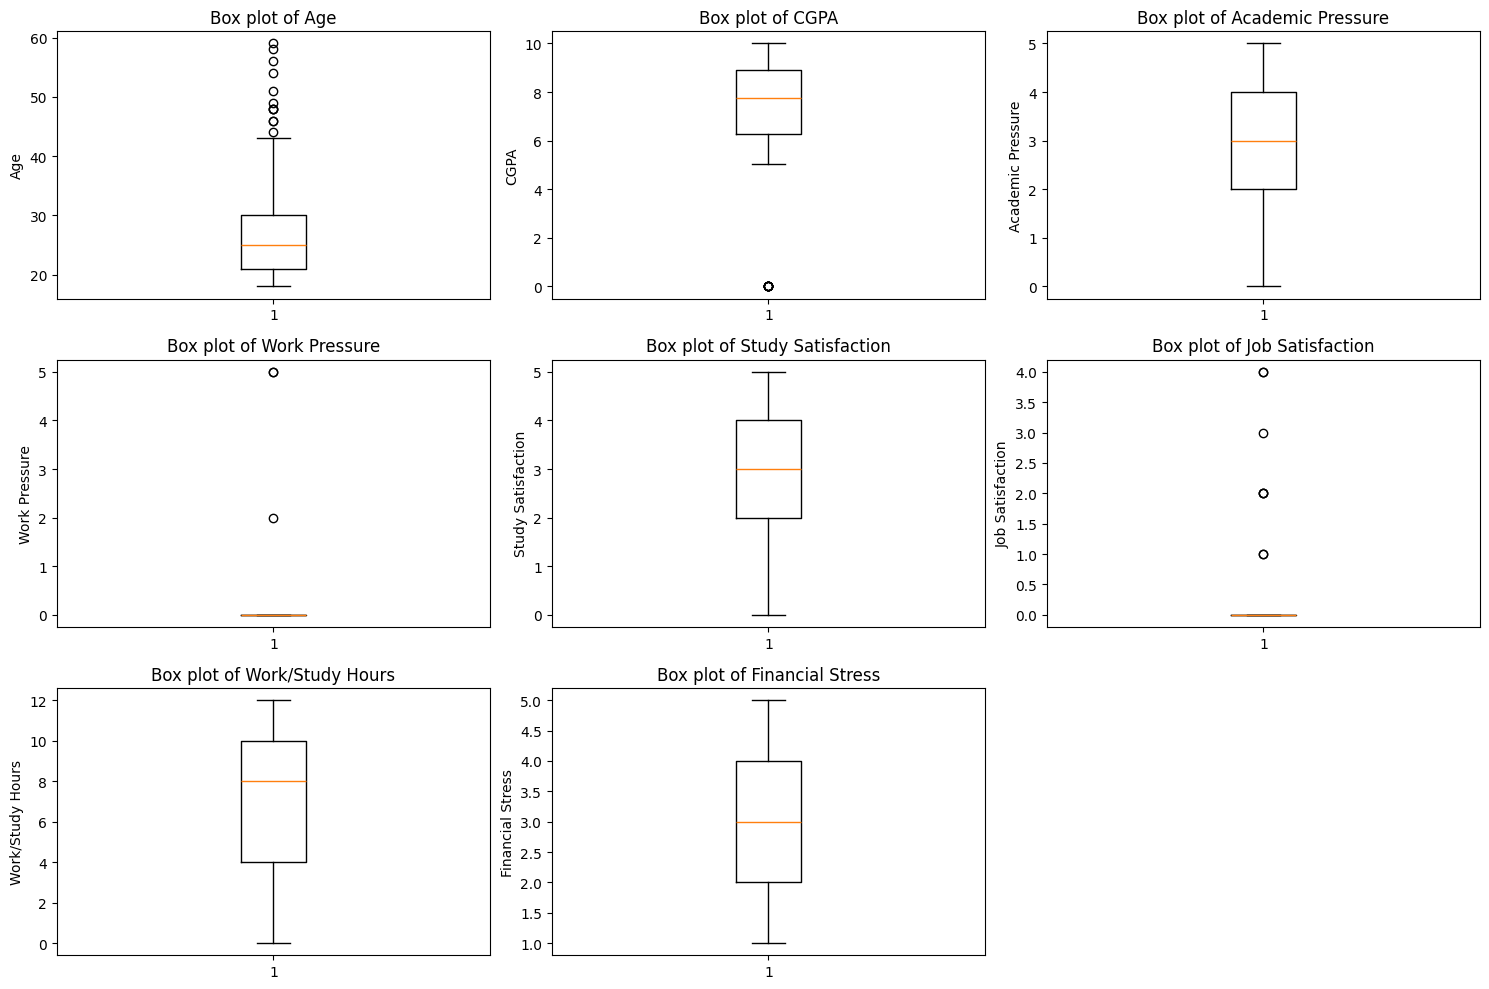


Outlier detection using IQR:
Column 'Age': 12 outliers detected (below 7.50 or above 43.50)
Column 'CGPA': 9 outliers detected (below 2.33 or above 12.87)
Column 'Academic Pressure': 0 outliers detected (below -1.00 or above 7.00)
Column 'Work Pressure': 3 outliers detected (below 0.00 or above 0.00)
Column 'Study Satisfaction': 0 outliers detected (below -1.00 or above 7.00)
Column 'Job Satisfaction': 8 outliers detected (below 0.00 or above 0.00)
Column 'Work/Study Hours': 0 outliers detected (below -5.00 or above 19.00)
Column 'Financial Stress': 0 outliers detected (below -1.00 or above 7.00)


In [22]:
numerical_cols = ['Age', 'CGPA', 'Academic Pressure', 'Work Pressure', 'Study Satisfaction', 'Job Satisfaction', 'Work/Study Hours', 'Financial Stress']

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 3, i + 1)
    plt.boxplot(df[col])
    plt.title(f'Box plot of {col}')
    plt.ylabel(col)
plt.tight_layout()
plt.show()

print("\nOutlier detection using IQR:")
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers_count = df[(df[col] < lower_bound) | (df[col] > upper_bound)].shape[0]
    print(f"Column '{col}': {outliers_count} outliers detected (below {lower_bound:.2f} or above {upper_bound:.2f})")

In [23]:
# Remove outliers using IQR method

def remove_outliers_iqr(df, columns):
    
    # Yo, this function's gonna clean up the dataframe by removing outliers 
    # from the specified columns using the IQR method.
    
    df_clean = df.copy() # Don't wanna mess up the original, ya know?
    for col in columns:
        # Calculate the quartiles and IQR, like a boss
        Q1 = df_clean[col].quantile(0.25) # 25th percentile
        Q3 = df_clean[col].quantile(0.75) # 75th percentile
        IQR = Q3 - Q1 # Interquartile range

        # Define the outlier boundaries, stayin' within the limits
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Keep only the values within the IQR boundaries, peace out outliers!
        df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]
    return df_clean.reset_index(drop=True) # Reset index for a clean look


df_clean = remove_outliers_iqr(df, numerical_cols)

print("Shape before cleaning:", df.shape)
print("Shape after cleaning:", df_clean.shape)


Shape before cleaning: (27875, 17)
Shape after cleaning: (27852, 17)


In [24]:
# i wanna know the missing percentage of each column
def missing_percentage(old_rows, new_rows):
    lost = old_rows - new_rows
    percent = (lost / old_rows) * 100
    return lost, round(percent, 3)

lost, percent = missing_percentage(27901, 27852)
print(f"Rows lost: {lost}")
print(f"Missing percentage: {percent}%")


Rows lost: 49
Missing percentage: 0.176%


# Step 1: Feature Engineering

In [25]:
# 1. Age Groups: Categorize continuous 'Age' into bins.
age_bins = [17, 24, 35, 45]
age_labels = ['Young Adult (18-24)', 'Adult (25-35)', 'Mid-Career (36-45)']
df['Age Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=True)
df['Age Group'].value_counts()

Age Group
Adult (25-35)          15672
Young Adult (18-24)    12164
Mid-Career (36-45)        28
Name: count, dtype: int64

In [26]:

# 2. Total Pressure Score: Unchanged.
df['Total Pressure'] = df['Academic Pressure'] + df['Work Pressure']

# 3. Workload Indicator: Unchanged.
hours_bins = [0, 8, 12, 24]
hours_labels = ['Balanced', 'High', 'Overload']
df['Workload'] = pd.cut(df['Work/Study Hours'], bins=hours_bins, labels=hours_labels, right=False)

# 4. Sleep Quality (NEW FEATURE): Create descriptive labels from the mapped sleep duration.
# This makes our plots much more readable than using numbers 0-4.
sleep_quality_map = {
    1: 'Poor (<5h)',
    2: 'Fair (5-6h)',
    3: 'Good (7-8h)',
    4: 'Excellent (>8h)',
    0: 'Other'
}
df['Sleep Quality'] = df['Sleep Duration'].map(sleep_quality_map)

# 5. Overall Satisfaction: Unchanged.
df['Overall Satisfaction'] = np.where(df['Profession'] == 'Student',
                                      df['Study Satisfaction'],
                                      df['Job Satisfaction'])

print("\nDataFrame Head with New and Revised Features:")
print(df[['Sleep Duration', 'Sleep Quality', 'Age Group', 'Total Pressure', 'Workload']].head())

# Rename a long column for easier use in plotly titles/labels
df.rename(columns={'Have you ever had suicidal thoughts ?': 'Suicidal Thoughts'}, inplace=True)


DataFrame Head with New and Revised Features:
   Sleep Duration Sleep Quality            Age Group  Total Pressure  Workload
0               2   Fair (5-6h)        Adult (25-35)             5.0  Balanced
1               2   Fair (5-6h)  Young Adult (18-24)             2.0  Balanced
2               1    Poor (<5h)        Adult (25-35)             3.0      High
3               3   Good (7-8h)        Adult (25-35)             3.0  Balanced
4               2   Fair (5-6h)        Adult (25-35)             4.0  Balanced


# Insights : 

### Q1: How does the count of individuals with and without depression compare across different genders?

In [27]:
fig1 = px.histogram(df, x='Gender', color='Depression', barmode='group',
                    title='<b>Depression Distribution by Gender</b>',
                    text_auto=True)
fig1.show()
# 1 : means Yes , 0 : means No

### Q2: Do individuals reporting depression experience a higher combined work and academic pressure?

In [28]:
fig2 = px.box(df, x='Depression', y='Total Pressure', color='Depression',
              title='<b>Total Pressure vs. Depression Status</b>',
              labels={'Total Pressure': 'Combined Academic & Work Pressure Score'},
              points="all")
fig2.show()

### Q3 :What is the relationship between educational attainment (Degree) and the rate of depression?

In [29]:
# Calculate the depression rate for each degree
depression_by_degree = df.groupby('Degree')['Depression'].mean().mul(100).reset_index()

fig13 = px.bar(depression_by_degree.sort_values('Depression', ascending=False),
               x='Degree', y='Depression',
               title='<b>Depression Rate by Highest Educational Degree</b>',
               labels={'Depression': 'Depression Rate (%)', 'Degree': 'Educational Degree'},
               text=depression_by_degree['Depression'].apply(lambda x: f'{x:.1f}%'))
fig13.show()

### Q5: How does a person's workload (Balanced, High, Overload) correlate with their sleep quality

In [30]:
fig5 = px.density_heatmap(df, x='Workload', y='Sleep Quality',
                           title='<b>Insight 5: How Workload Affects Sleep Quality</b>',
                           text_auto=True)
fig5.show()

### Q6: Where do cases of depression concentrate when measured against levels of financial stress

In [31]:
fig6 = px.density_heatmap(df, x='Financial Stress', y='Depression',
                          title='<b>Concentration of Depression by Financial Stress Level</b>',
                          labels={'Financial Stress': 'Level of Financial Stress (1-5)'})
fig6.show()

### Q7: What is the proportional impact of having a family history of mental illness on an individual's depression status?

In [32]:
fig7 = px.sunburst(df, path=['Family History of Mental Illness', 'Depression'],
                   title='<b>Insight 7: Impact of Family History on Depression</b>')
fig7.show()

### Q8: How does the distribution of overall life satisfaction differ between those with and without depression?

In [33]:
fig8 = px.violin(df, x='Depression', y='Overall Satisfaction', color='Depression',
                 box=True,
                 title='<b>Insight 8: Overall Satisfaction and its Link to Depression</b>',
                 labels={'Overall Satisfaction': 'Job/Study Satisfaction Score (1-5)'})
fig8.show()

### Q10: How strongly are reported suicidal thoughts and depression correlated?

In [34]:
fig10 = px.density_heatmap(df, x='Suicidal Thoughts', y='Depression',
                          text_auto=True,
                          title='<b>Insight 10: Correlation between Suicidal Thoughts and Depression</b>')
fig10.show()

### Q14: Does higher financial stress correlate with poorer sleep quality?

In [35]:
fig14 = px.box(df,
               x='Sleep Quality', y='Financial Stress',
               color='Sleep Quality',
               category_orders={'Sleep Quality': ['Poor (<5h)', 'Fair (5-6h)', 'Good (7-8h)', 'Excellent (>8h)', 'Other']},
               title='<b>Insight 14: How Financial Stress Impacts Sleep Quality</b>',
               labels={'Financial Stress': 'Level of Financial Stress (1-5)'})
fig14.show()

### Q15: Do males and females in this dataset report different levels of total pressure?

In [36]:
fig15 = px.box(df, x='Gender', y='Total Pressure',
               color='Gender',
               title='<b>Comparison of Total Pressure by Gender</b>',
               labels={'Total Pressure': 'Combined Academic & Work Pressure Score'})
fig15.show()

In [37]:
# Export CSV File 
df.to_csv('Student_Depression_Cleaned.csv', index=False)
